## 0.Exemples de codes pour faire des courbes d'équation

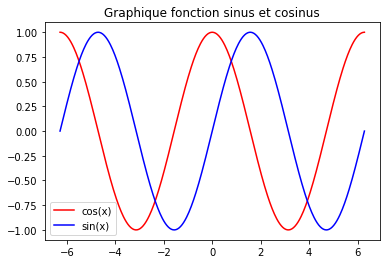

<Figure size 432x288 with 0 Axes>

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x=np.linspace(-np.pi*2,np.pi*2,400)
y1=np.cos(x)
y2=np.sin(x)
plt.plot(x,y1, color='r', label='cos(x)')
plt.plot(x,y2, color='b', label='sin(x)')
plt.title('Graphique fonction sinus et cosinus')
plt.legend()
plt.show()
plt.clf()

## 1. Inspecting transfusion.data file
<p><img src="https://assets.datacamp.com/production/project_646/img/blood_donation.png" style="float: right;" alt="A pictogram of a blood bag with blood donation written in it" width="200"></p>
<p>Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. According to <a href="https://www.webmd.com/a-to-z-guides/blood-transfusion-what-to-know#1">WebMD</a>, "about 5 million Americans need a blood transfusion every year".</p>
<p>Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.</p>
<p>The data is stored in <code>datasets/transfusion.data</code> and it is structured according to RFMTC marketing model (a variation of RFM). We'll explore what that means later in this notebook. First, let's inspect the data.</p>

In [1]:
# Print out the first 5 lines from the transfusion.data file
!head -n 5 datasets/transfusion.data 


'head' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


## 2. Loading the blood donations data
<p>We now know that we are working with a typical CSV file (i.e., the delimiter is <code>,</code>, etc.). We proceed to loading the data into memory.</p>

In [2]:
# Import pandas
import pandas as pd

# Read in dataset
transfusion = pd.read_csv("datasets/transfusion.data")

# Print out the first rows of our dataset
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## 3. Quelques représentations utilisant le cours Seaborn_Python



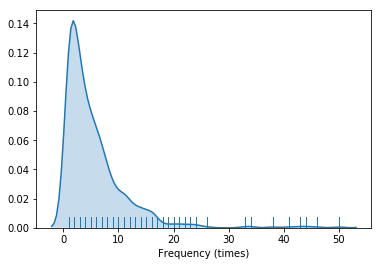

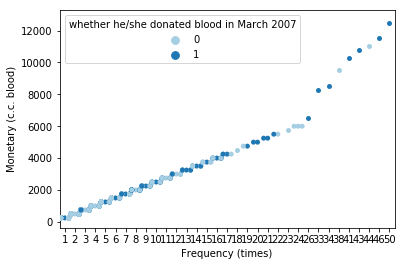

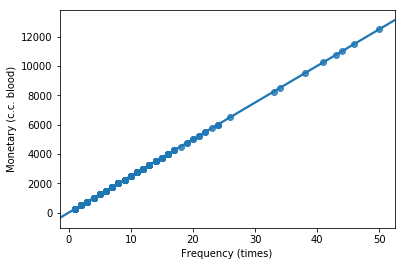

<Figure size 432x288 with 0 Axes>

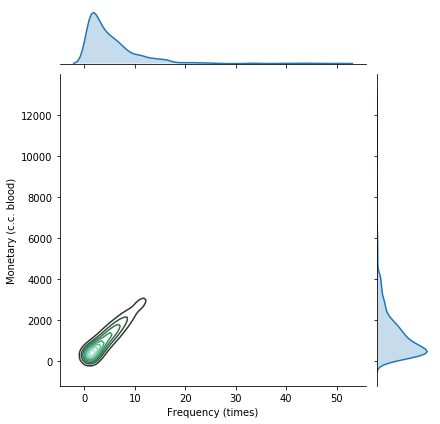

<Figure size 432x288 with 0 Axes>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.distplot(transfusion['Monetary (c.c. blood)'])
#sns.distplot(transfusion['Frequency (times)'])
sns.distplot(transfusion['Frequency (times)'], hist = False, rug=True,
            kde_kws={'shade' : True})
plt.show()
plt.clf()

sns.swarmplot(data=transfusion,
          x='Frequency (times)',
          y='Monetary (c.c. blood)',
          palette='Paired',
          hue='whether he/she donated blood in March 2007')
plt.show()
plt.clf()

sns.regplot(data=transfusion,
          x='Frequency (times)',
          y='Monetary (c.c. blood)'
          )
plt.show()
plt.clf()

g=(sns.JointGrid(data=transfusion,
          x='Frequency (times)',
          y='Monetary (c.c. blood)'
          ))
g=g.plot_joint(sns.kdeplot)
g=g.plot_marginals(sns.kdeplot, shade=True)
plt.show()
plt.clf()



C:\Users\loicm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\loicm\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


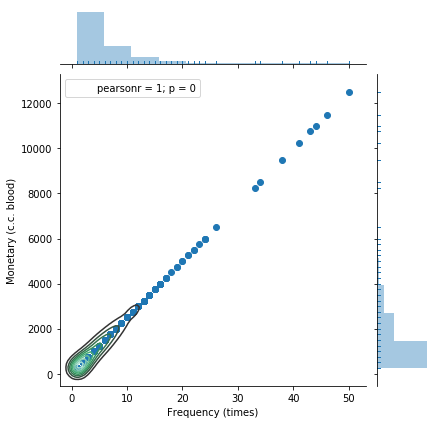

<Figure size 432x288 with 0 Axes>

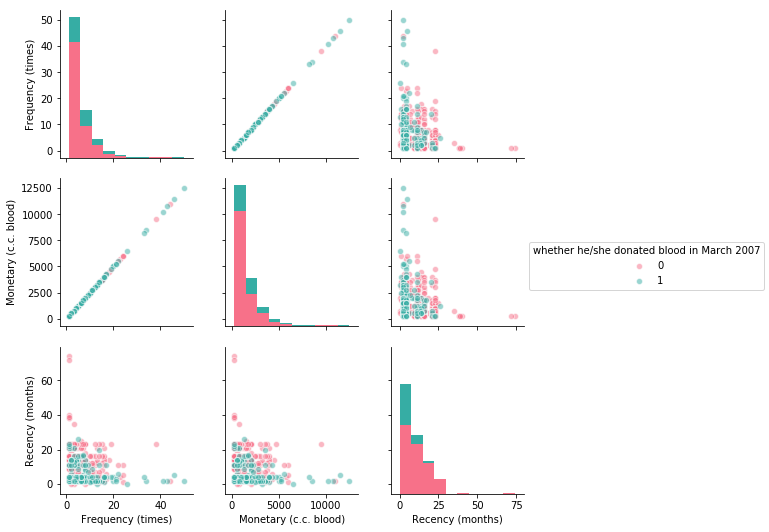

<Figure size 432x288 with 0 Axes>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

h=(sns.jointplot(data=transfusion,
          x='Frequency (times)',
          y='Monetary (c.c. blood)',
          kind='scatter',
          marginal_kws=dict(bins=10, rug=True)      
          ))
h=h.plot_joint(sns.kdeplot)
plt.show()
plt.clf()

i=(sns.pairplot(transfusion, vars=['Frequency (times)', 
        'Monetary (c.c. blood)', 'Recency (months)'], 
        hue = 'whether he/she donated blood in March 2007',
        palette='husl',
        plot_kws={'alpha': 0.5}))
plt.show()
plt.clf()

## 3. Inspecting transfusion DataFrame
<p>Let's briefly return to our discussion of RFM model. RFM stands for Recency, Frequency and Monetary Value and it is commonly used in marketing for identifying your best customers. In our case, our customers are blood donors.</p>
<p>RFMTC is a variation of the RFM model. Below is a description of what each column means in our dataset:</p>
<ul>
<li>R (Recency - months since the last donation)</li>
<li>F (Frequency - total number of donation)</li>
<li>M (Monetary - total blood donated in c.c.)</li>
<li>T (Time - months since the first donation)</li>
<li>a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)</li>
</ul>
<p>It looks like every column in our DataFrame has the numeric type, which is exactly what we want when building a machine learning model. Let's verify our hypothesis.</p>

In [6]:
# Print a concise summary of transfusion DataFrame
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency (months)                              748 non-null int64
Frequency (times)                             748 non-null int64
Monetary (c.c. blood)                         748 non-null int64
Time (months)                                 748 non-null int64
whether he/she donated blood in March 2007    748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


## 4. Creating target column
<p>We are aiming to predict the value in <code>whether he/she donated blood in March 2007</code> column. Let's rename this it to <code>target</code> so that it's more convenient to work with.</p>

In [7]:
# Rename target column as 'target' for brevity 
transfusion.rename(
    columns={'whether he/she donated blood in March 2007': "target"},
    inplace=True
)

# Print out the first 2 rows
transfusion.head(n=2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1


## 5. Checking target incidence
<p>We want to predict whether or not the same donor will give blood the next time the vehicle comes to campus. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:</p>
<ul>
<li><code>0</code> - the donor will not give blood</li>
<li><code>1</code> - the donor will give blood</li>
</ul>
<p>Target incidence is defined as the number of cases of each individual target value in a dataset. That is, how many 0s in the target column compared to how many 1s? Target incidence gives us an idea of how balanced (or imbalanced) is our dataset.</p>

Explanation 
By default, value_counts() method returns counts of unique values. By setting normalize=True, the value_counts() will return the relative frequencies of the unique values instead

In [8]:
# Print target incidence proportions, rounding output to 3 decimal places
transfusion.target.value_counts(normalize=True).round(3)

0    0.762
1    0.238
Name: target, dtype: float64

## 6. Splitting transfusion into train and test datasets
<p>We'll now use <code>train_test_split()</code> method to split <code>transfusion</code> DataFrame.</p>
<p>Target incidence informed us that in our dataset <code>0</code>s appear 76% of the time. We want to keep the same structure in train and test datasets, i.e., both datasets must have 0 target incidence of 76%. This is very easy to do using the <code>train_test_split()</code> method from the <code>scikit learn</code> library - all we need to do is specify the <code>stratify</code> parameter. In our case, we'll stratify on the <code>target</code> column.</p>

In [9]:
# Import train_test_split method
from sklearn.model_selection import train_test_split

# Split transfusion DataFrame into
# X_train, X_test, y_train and y_test datasets,
# stratifying on the `target` column
X_train, X_test, y_train, y_test = train_test_split(
    transfusion.drop(columns='target'),
    transfusion.target,
    test_size=0.25,
    random_state=42,
    stratify=transfusion.target
)

# Print out the first 2 rows of X_train
X_train.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
334,16,2,500,16
99,5,7,1750,26


# Ne pas lancer le 7 car library non trouvable

## 7. Selecting model using TPOT
<p><a href="https://github.com/EpistasisLab/tpot">TPOT</a> is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.</p>
<p><img src="https://assets.datacamp.com/production/project_646/img/tpot-ml-pipeline.png" alt="TPOT Machine Learning Pipeline"></p>
<p>TPOT will automatically explore hundreds of possible pipelines to find the best one for our dataset. Note, the outcome of this search will be a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">scikit-learn pipeline</a>, meaning it will include any pre-processing steps as well as the model.</p>
<p>We are using TPOT to help us zero in on one model that we can then explore and optimize further.</p>

In [7]:
# Import TPOTClassifier and roc_auc_score
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')

ModuleNotFoundError: No module named 'tpot'

## 7bis. Utilisation du cours Machine Learning with tree-based Python


In [10]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import accuracy_score
from sklearn.metrics import accuracy_score
dt1 = DecisionTreeClassifier(max_depth=2, random_state=1)
# Fit dt to the training set
dt1.fit(X_train,y_train)
# Predict test set labels
y_pred = dt1.predict(X_test)
# Evaluate test-set accuracy
logAUC = accuracy_score(y_test, y_pred)
print(f'\nlogAUC score: {logAUC:.6f}')

# Instantiate dt, set 'criterion' to 'gini'
dt2 = DecisionTreeClassifier(criterion='gini', random_state=1)
# Fit dt to the training set
dt2.fit(X_train,y_train)
# Predict test-set labels
y_pred= dt2.predict(X_test)
# Evaluate test-set accuracy
giniAUC = accuracy_score(y_test, y_pred)
print(f'\nginiAUC score: {giniAUC:.4f}')


logAUC score: 0.764706

giniAUC score: 0.6845


## 8. Checking the variance
<p>TPOT picked <code>LogisticRegression</code> as the best model for our dataset with no pre-processing steps, giving us the AUC score of 0.7850. This is a great starting point. Let's see if we can make it better.</p>
<p>One of the assumptions for linear regression models is that the data and the features we are giving it are related in a linear fashion, or can be measured with a linear distance metric. If a feature in our dataset has a high variance that's an order of magnitude or more greater than the other features, this could impact the model's ability to learn from other features in the dataset.</p>
<p>Correcting for high variance is called normalization. It is one of the possible transformations you do before training a model. Let's check the variance to see if such transformation is needed.</p>

In [11]:
# X_train's variance, rounding the output to 3 decimal places
X_train.var().round(3)

Recency (months)              66.929
Frequency (times)             33.830
Monetary (c.c. blood)    2114363.700
Time (months)                611.147
dtype: float64

## 9. Log normalization
<p><code>Monetary (c.c. blood)</code>'s variance is very high in comparison to any other column in the dataset. This means that, unless accounted for, this feature may get more weight by the model (i.e., be seen as more important) than any other feature.</p>
<p>One way to correct for high variance is to use log normalization.</p>

In [12]:
# Import numpy
import numpy as np

# Copy X_train and X_test into X_train_normed and X_test_normed
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

# Specify which column to normalize
col_to_normalize = 'Monetary (c.c. blood)'

# Log normalization
for df_ in [X_train_normed, X_test_normed]:
    # Add log normalized column
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    # Drop the original column
    df_.drop(columns=col_to_normalize, inplace=True)

# Check the variance for X_train_normed
X_train_normed.var().round(3)

Recency (months)      66.929
Frequency (times)     33.830
Time (months)        611.147
monetary_log           0.837
dtype: float64

## 10. Training the linear regression model
<p>The variance looks much better now. Notice that now <code>Time (months)</code> has the largest variance, but it's not the <a href="https://en.wikipedia.org/wiki/Order_of_magnitude">orders of magnitude</a> higher than the rest of the variables, so we'll leave it as is.</p>
<p>We are now ready to train the linear regression model.</p>

In [27]:
# Importing modules
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

# Instantiate LogisticRegression
logreg = linear_model.LogisticRegression(
    solver='liblinear',
    random_state=42
)

# Train the model
logreg.fit(X_train_normed, y_train)

# AUC score for tpot model
logreg_auc_score = roc_auc_score(y_test,
    logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7891


## 10. Voting Classifier in sklearn (Tree-Based Python)


In [28]:
# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
# Set seed for reproducibility
SEED = 1

# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
# Define a list called classifier that contains the tuples
# (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
    ('K Nearest Neighbours', knn),
    ('Classification Tree', dt)]

# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train_normed, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.759
K Nearest Neighbours : 0.765
Classification Tree : 0.738


## 10 Bagging Training 
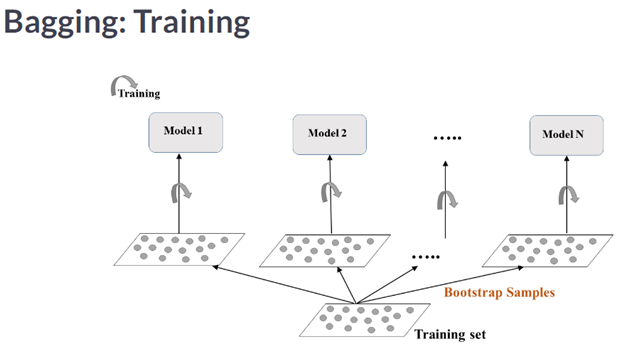

In [29]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Instantiate a classification-tree 'dt'
dt3 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)
# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt3, n_estimators=300, n_jobs=-1)
# Fit 'bc' to the training set
bc.fit(X_train_normed, y_train)
# Predict test set labels
y_pred = bc.predict(X_test)
# Evaluate and print test-set accuracy
accuracy_bag = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy_bag))

Accuracy of Bagging Classifier: 0.765


## Random Forest
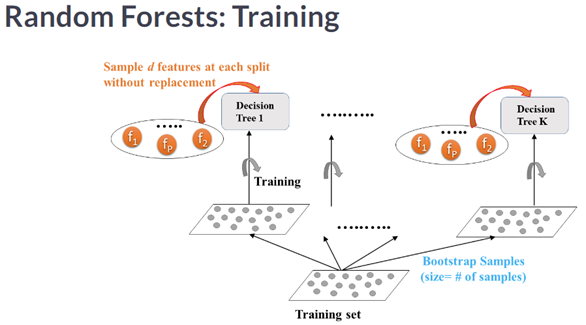

Test set RMSE of rf: 0.39


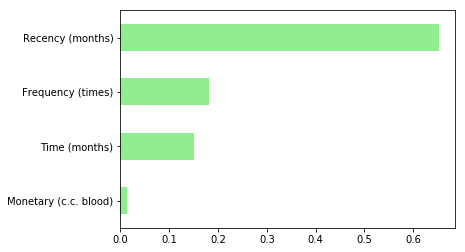

In [30]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400,
    min_samples_leaf=0.12,
    random_state=SEED)
# Fit 'rf' to the training set
rf.fit(X_train_normed, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = transfusion.drop(columns='target').columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

## AdaBoosting 
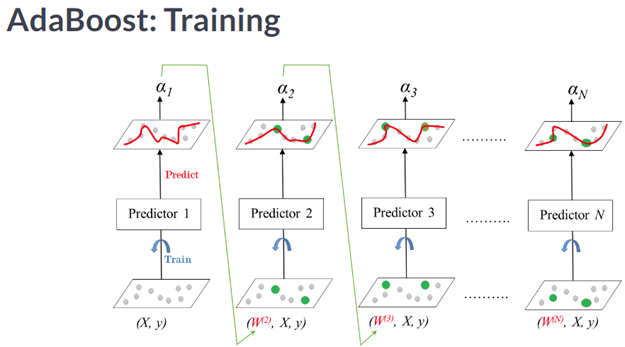

In [31]:
# Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Instantiate a classification-tree 'dt'
dt5 = DecisionTreeClassifier(max_depth=1, random_state=SEED)
# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt5, n_estimators=100)
# Fit 'adb_clf' to the training set
adb_clf.fit(X_train_normed, y_train)
# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
# Print adb_clf_roc_auc_score
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

ROC AUC score: 0.68


## 10. Inspecting the hyperparameters of CART

In [32]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Set seed to 1 for reproducibility
SEED = 1
# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=SEED)
# Print out 'dt's hyperparameters
print(dt.get_params())
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters 'params_dt'
params_dt = {
    'max_depth': [3, 4,5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4,0.6, 0.8]
    }
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt,
    param_grid=params_dt,
    scoring='accuracy',
    cv=10,
    n_jobs=-1)
# Fit 'grid_dt' to the training data
grid_dt.fit(X_train_normed, y_train)
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy'.format(best_CV_score))
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_
# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 1, 'splitter': 'best'}
Best hyerparameters:
 {'max_depth': 3, 'max_features': 0.6, 'min_samples_leaf': 0.04}
Best CV accuracy
Test set accuracy of best model: 0.765


## 10. Inspecting RF Hyperparameters in sklearn

In [33]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Set seed for reproducibility
SEED = 1
# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state= SEED)
# Inspect rf' s hyperparameters
rf.get_params()
# Basic imports
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
# Define a grid of hyperparameter 'params_rf'
params_rf = {
    'n_estimators': [300, 400, 500],
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [0.1, 0.2],
    'max_features': ['log2', 'sqrt']
    }
# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf,
    param_grid=params_rf,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1)
# Fit 'grid_rf' to the training set
grid_rf.fit(X_train_normed, y_train)
# Extract best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)
# Extract best model from 'grid_rf'
best_model = grid_rf.best_estimator_
# Predict the test set labels
y_pred = best_model.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   12.1s finished


Best hyerparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 400}
Test set RMSE of rf: 0.39


## 11. Conclusion
<p>The demand for blood fluctuates throughout the year. As one <a href="https://www.kjrh.com/news/local-news/red-cross-in-blood-donation-crisis">prominent</a> example, blood donations slow down during busy holiday seasons. An accurate forecast for the future supply of blood allows for an appropriate action to be taken ahead of time and therefore saving more lives.</p>
<p>In this notebook, we explored automatic model selection using TPOT and AUC score we got was 0.7850. This is better than simply choosing <code>0</code> all the time (the target incidence suggests that such a model would have 76% success rate). We then log normalized our training data and improved the AUC score by 0.5%. In the field of machine learning, even small improvements in accuracy can be important, depending on the purpose.</p>
<p>Another benefit of using logistic regression model is that it is interpretable. We can analyze how much of the variance in the response variable (<code>target</code>) can be explained by other variables in our dataset.</p>

In [37]:
# Importing itemgetter
from operator import itemgetter

# Sort models based on their AUC score from highest to lowest
sorted(
    [('Bagging : ', accuracy_bag), ('logreg : ', logreg_auc_score), ('AdaBoost : ', adb_clf_roc_auc_score)],
    key=itemgetter(1),
    reverse=True
    )

[('logreg : ', 0.7890972663699937),
 ('Bagging : ', 0.7647058823529411),
 ('AdaBoost : ', 0.6830896376350921)]